<a href="https://colab.research.google.com/github/Nikhil-Patil-Web/MachineLearningTutorials/blob/main/CodeAlongFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
file_path ="/content/drive/My Drive/MachineLearningUdemy/Section2/Data.csv"

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv(file_path)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


### Splitting the Data into Training Sets and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


### Normilization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train[:,3:]= sc.fit_transform(X_train[:,3:])
X_test[:,3:]= sc.transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830127, -0.9069571034860731],
       [1.0, 0.0, 0.0, -0.44973664397484425, 0.20564033932253029]],
      dtype=object)

# Linear Regression


### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Import the datasets

In [ ]:
filepath = "/content/drive/My Drive/MachineLearningUdemy/Section3/SimpleLinear/SimpleLinear/Python/Salary_Data.csv"
df = pd.read_csv(filepath)
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X=df.drop("Salary", axis=1)
X = X.values
Y=df["Salary"]
Y=Y.values
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
print(y_pred_train, y_train)

[122386.880839   107308.77632215  63016.8443039   35687.77986711
  46053.97672244  73383.04115923  52650.64744857  63959.2258362
  63016.8443039   99769.72406372  37572.54293172  39457.30599632
 110135.92091906  44169.21365784  92230.6718053  114847.82858057
  80922.09341766 124271.6439036   89403.52720839  55477.79204548
  62074.4627716   67728.75196542  81864.47494996  53593.02898087] [122391. 109431.  56957.  39343.  39891.  66029.  56642.  57081.  55794.
 101302.  46205.  37731. 105582.  43525.  98273. 116969.  81363. 121872.
  91738.  54445.  63218.  61111.  93940.  60150.]


24 24


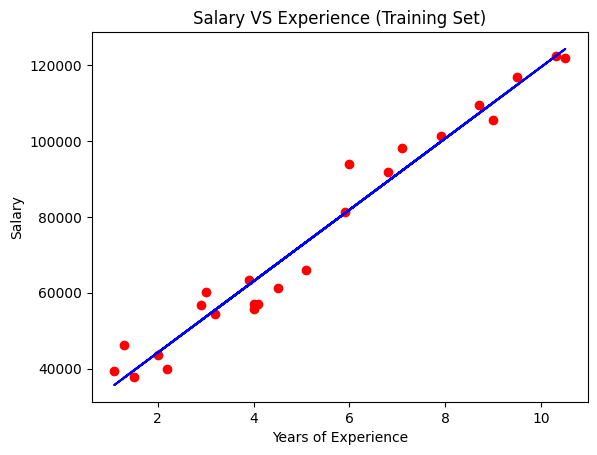

In [ ]:
import matplotlib.pyplot as plt
print(X_train.size, y_train.size)
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train,y_pred_train, color="blue")
plt.title("Salary VS Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

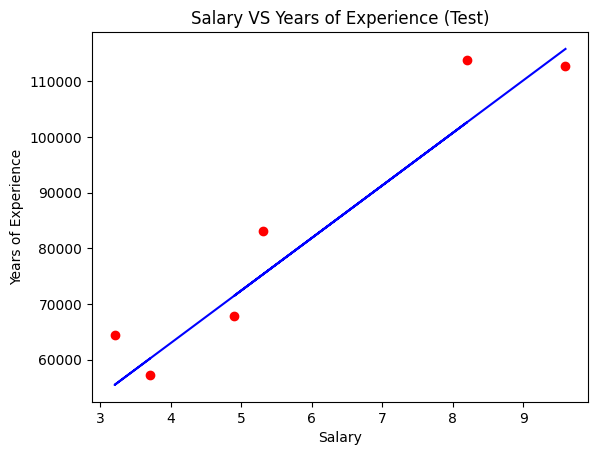

In [ ]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue")
plt.title("Salary VS Years of Experience (Test)")
plt.xlabel("Salary")
plt.ylabel("Years of Experience")
plt.show()

# Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
filepath = "/content/drive/My Drive/MachineLearningUdemy/Section3/MultipleLinear/MultipleLinear/Python/50_Startups.csv"
df = pd.read_csv(filepath)
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We will generate our X and y dataframe matrices

In [ ]:
X = df.drop("Profit", axis=1)
X= X.values
y= df["Profit"]
y=y.values

Encoding the State file with the help of a one hot encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [3] )], remainder="passthrough")
X= np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

We will split the data in train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(40, 6) (10, 6)


Calling and fitting the model to our dataset


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_preds= model.predict(X_train)
y_pred = model.predict(X_test)

Printing the graphical representation of our predictions

In [ ]:
np.set_printoptions(precision=2)
print (np.concatenate((y_pred.reshape (len (y_pred),1), y_test.reshape(len (y_test),1)),1))

[[126362.88 134307.35]
 [ 84608.45  81005.76]
 [ 99677.49  99937.59]
 [ 46357.46  64926.08]
 [128750.48 125370.37]
 [ 50912.42  35673.41]
 [109741.35 105733.54]
 [100643.24 107404.34]
 [ 97599.28  97427.84]
 [113097.43 122776.86]]


### Polynomial Linear Regression

We call it polynomial linear regression as even though the powers of X are more than 1, we have the power of the coefficients is 1. And in our case, we are more keen on the co-efficients.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
filepath = "/content/drive/My Drive/MachineLearningUdemy/Section3/PolynomialRegression/PolynomialRegression/Python/Position_Salaries.csv"
df = pd.read_csv(filepath)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X= df.drop("Salary", axis=1)
X= X.drop("Position", axis=1).values
y= df["Salary"].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


We will make a comparative study by fitting this model on a linear regression and on a polynomial regression.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);
print(X_train)

[[ 6]
 [ 1]
 [ 8]
 [ 3]
 [10]
 [ 5]
 [ 4]
 [ 7]]


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
y_train_preds= model.predict(X_train)
y_preds = model.predict(X_test)

print(y_test, y_preds)

[500000  50000] [550732.75862069 -64482.75862069]


In [ ]:
print(y_train, y_train_preds)

[ 150000   45000  300000   60000 1000000  110000   80000  200000] [ 287068.96551724 -152370.68965517  462844.82758621   23405.17241379
  638620.68965517  199181.03448276  111293.10344828  374956.89655172]


We will train using the entire dataset in this case as we want to predict extrapolated values such as a 6.5 or a 7.3 or 12. Basically we want results for values which or not of the nature (integer) of our input data or are not in the range of our input data which in this case is 0 to 10.

In [ ]:
model =LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [ ]:
linearRegression1 = LinearRegression()
linearRegression2 = LinearRegression()
linearRegression1.fit(X, y)
linearRegression2.fit(X_poly, y)


LinearRegression()

### Visualize the difference between both the models

Text(0, 0.5, 'Salary')

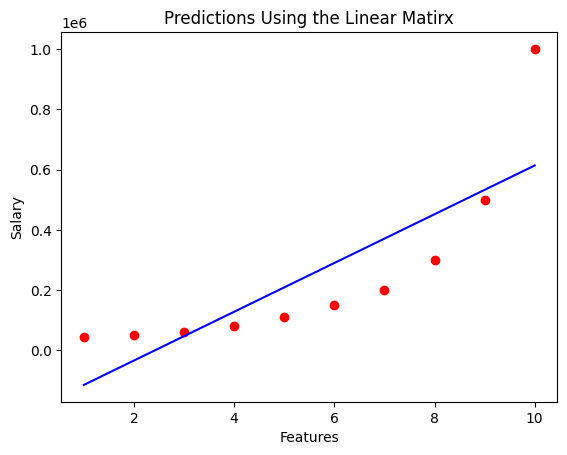

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color="red")
plt.plot(X, linearRegression1.predict(X), color="blue")
plt.title("Predictions Using the Linear Matirx")
plt.xlabel("Features")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

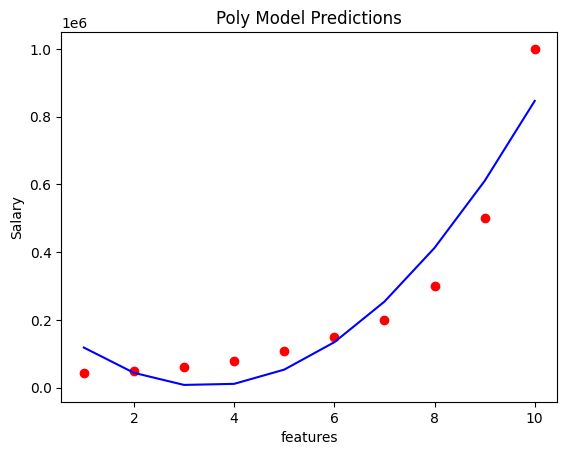

In [ ]:
plt.scatter(X,y, color="red")
plt.plot(X, linearRegression2.predict(X_poly), color="blue")
plt.title("Poly Model Predictions")
plt.xlabel('features')
plt.ylabel("Salary")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=3)
poly_reg_3 = PolynomialFeatures(degree=4)

X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)

linearRegression3 = LinearRegression().fit(X_poly_2, y)
linearRegression4 = LinearRegression().fit(X_poly_3, y)


Visualize the two curves that have been made using these two datasets called as X_poly_2 and X_poly_3

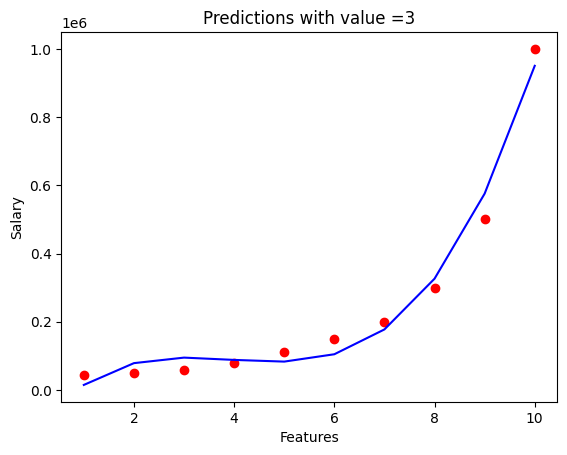

In [ ]:
plt.scatter(X, y, color="red")
plt.plot(X, linearRegression3.predict(X_poly_2), color="blue")
plt.title("Predictions with value =3")
plt.xlabel("Features")
plt.ylabel("Salary")
plt.show()

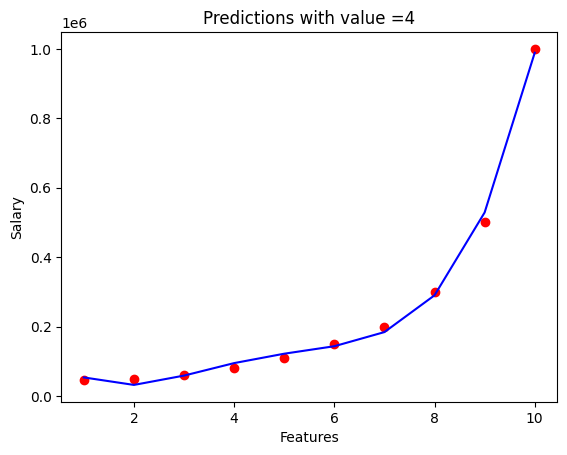

In [ ]:
plt.scatter(X, y, color="red")
plt.plot(X, linearRegression4.predict(X_poly_3), color="blue")
plt.title("Predictions with value =4")
plt.xlabel("Features")
plt.ylabel("Salary")
plt.show()

In [ ]:
y_pred1 = linearRegression1.predict([[6.5]])
y_pred1

array([330378.78787879])

In [ ]:
y_pred2 = linearRegression2.predict([[1, 6.5, 42.25]])
y_pred2

array([189498.10606061])

In [ ]:
y_pred3 = linearRegression3.predict([[1, 6.5, 42.25, 274.625]])
y_pred3

array([133259.46969697])

### Support Vector Regression

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
filepath ="/content/drive/My Drive/MachineLearningUdemy/Section3/SupportVectorRegression/SupportVectorRegression/Python/Position_Salaries.csv"
df = pd.read_csv(filepath)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = df.drop("Position", axis=1)
X= X.drop("Salary", axis=1)
X= X.values
y= df["Salary"]
y=y.values


Feature Scaling

In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
final=[]
for i in y:
  temp=[];
  temp.append(i)
  final.append(temp)

y= final
print(y)


[[45000], [50000], [60000], [80000], [110000], [150000], [200000], [300000], [500000], [1000000]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy = StandardScaler()

X = scx.fit_transform(X)
y = scy.fit_transform(y)

print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


We will now make the SVR model with a radial basis function kernel

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
predicted_val =regressor.predict(scx.transform([[6.5]])).reshape(-1,1)
val = scy.inverse_transform(predicted_val)
val

array([[0.01150915]])

In [ ]:
import pandas as pd
import numpy as np
filepath ="/content/drive/My Drive/MachineLearningUdemy/Section3/SupportVectorRegression/SupportVectorRegression/Python/Position_Salaries.csv"
df = pd.read_csv(filepath)
X = df.drop("Position", axis=1)
X= X.drop("Salary", axis=1)
X= X.values
y= df["Salary"]
y=y.values

In [ ]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()

X= scx.fit_transform(X)
y= scy.fit_transform(y)


In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel ="rbf")
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
val = scx.transform([[6.5]])
value= regressor.predict(val).reshape(-1,1)
value

array([[0.01158103]])

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])).reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.01158103]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
filepath ="/content/drive/My Drive/MachineLearningUdemy/Section3/SupportVectorRegression/SupportVectorRegression/Python/Position_Salaries.csv"
df = pd.read_csv(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(filepath)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
val =regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)
val

array([[-0.27861589]])

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [ ]:
X_inverse = sc_X.inverse_transform(X)
y_inverse = sc_y.inverse_transform(y)


[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


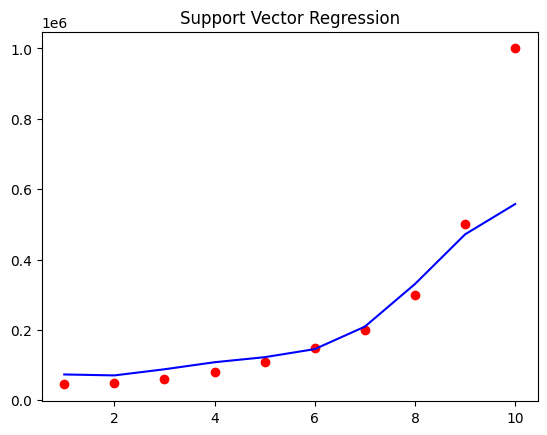

In [ ]:
plt.scatter(X_inverse, y_inverse, color="red")
plt.plot(X_inverse, sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color="blue")
plt.title("Support Vector Regression")
plt.xlabel ="Position Level"
plt.ylabel ="Salary"
plt.show()

<ipython-input-58-4f066a562862>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_inverse), max(X_inverse), 0.1)


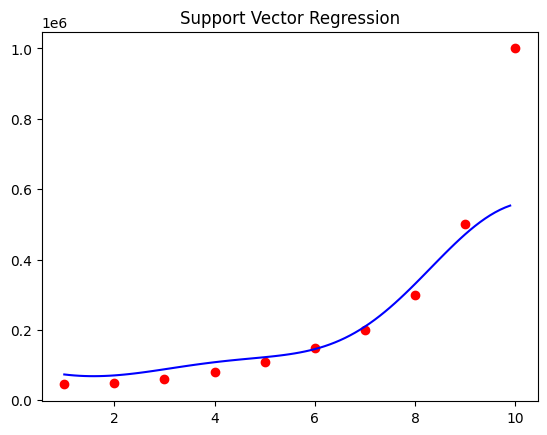

In [ ]:
X_grid = np.arange(min(X_inverse), max(X_inverse), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X_inverse, y_inverse, color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color="blue")
plt.title("Support Vector Regression")
plt.xlabel ="Position Level"
plt.ylabel ="Salary"
plt.show()